<a href="https://colab.research.google.com/github/Maspie/-Assignment/blob/main/Otsu's_Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-4366786a351f>:22: RuntimeWarning: invalid value encountered in divide
  between_class_variance = (total_mean * cumulative_sum - cumulative_mean) ** 2 / (cumulative_sum * (1 - cumulative_sum))


Optimal Threshold: 137


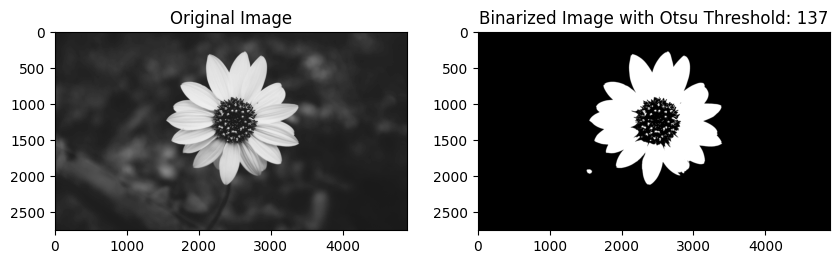

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_thresholding(image):
    # Calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Normalize histogram
    hist = hist / hist.sum()

    # Cumulative sum of histogram
    cumulative_sum = np.cumsum(hist)

    # Cumulative mean of histogram
    cumulative_mean = np.cumsum(hist * np.arange(256))

    # Total mean of the histogram
    total_mean = cumulative_mean[-1]

    # Compute between-class variance
    between_class_variance = (total_mean * cumulative_sum - cumulative_mean) ** 2 / (cumulative_sum * (1 - cumulative_sum))

    # Ignore nan values
    between_class_variance = np.nan_to_num(between_class_variance)

    # Find the threshold that maximizes the between-class variance
    optimal_threshold = np.argmax(between_class_variance)

    return optimal_threshold

def apply_threshold(image, threshold):
    # Apply the threshold to the image
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

image = cv2.imread('/content/flower.jpg', 0)

# Perform Otsu's thresholding
optimal_threshold = otsu_thresholding(image)
print(f'Optimal Threshold: {optimal_threshold}')

# Apply the threshold to the image
binary_image = apply_threshold(image, optimal_threshold)

# Display the original and binarized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binarized Image with Otsu Threshold: {optimal_threshold}')
plt.show()
